In [22]:
# ==========================================================
# 🌍 Togo EDA Notebook — Solar Challenge Week 0
# Author: Rufta Gaiem Weldegiorgis
# Purpose: Data cleaning, outlier detection, and EDA for Togo dataset
# ==========================================================


# ----------------------------------------------------------
# 📦 Cell 1 — Import Dependencies & Setup
# ----------------------------------------------------------
import os
import sys
sys.path.append(os.path.abspath("..")) # allows imports from parent folder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import reusable cleaning and visualization functions
from scripts.clean_data import (
    load_and_basic_clean,
    summarize_outliers,
    impute_median,
    export_clean
)
from scripts.eda_tools import (
    plot_daily_ghi,
    plot_correlation_heatmap,
    plot_scatter,
    plot_wind_histogram,
    plot_bubble_chart,
    compare_cleaning_effect
)

# Set default visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [23]:
# ----------------------------------------------------------
# 📂 Cell 2 — Load and Profile Raw Dataset
# ----------------------------------------------------------
RAW_PATH = "../data/togo-dapaong_qc.csv"
df_raw = pd.read_csv(RAW_PATH)

print("Raw shape:", df_raw.shape)
display(df_raw.info())
display(df_raw.describe().T)

# Check missing values
print("\nMissing value counts:")
display(df_raw.isna().sum())

# Columns with >5% null values
total = len(df_raw)
null_pct = (df_raw.isna().sum() / total) * 100
print("\nColumns with >5% nulls:")
print(null_pct[null_pct > 5].sort_values(ascending=False))

Raw shape: (525600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB

None

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,230.555040,322.532347,-12.7,-2.2,2.1,442.400,1424.0
DNI,525600.0,151.258469,250.956962,0.0,0.0,0.0,246.400,1004.5
DHI,525600.0,116.444352,156.520714,0.0,0.0,2.5,215.700,805.7
ModA,525600.0,226.144375,317.346938,0.0,0.0,4.4,422.525,1380.0
ModB,525600.0,219.568588,307.932510,0.0,0.0,4.3,411.000,1367.0
Tamb,525600.0,27.751788,4.758023,14.9,24.2,27.2,31.100,41.4
RH,525600.0,55.013160,28.778732,3.3,26.5,59.3,80.800,99.8
WS,525600.0,2.368093,1.462668,0.0,1.4,2.2,3.200,16.1
WSgust,525600.0,3.229490,1.882565,0.0,1.9,2.9,4.400,23.1
WSstdev,525600.0,0.557740,0.268923,0.0,0.4,0.5,0.700,4.7



Missing value counts:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


Columns with >5% nulls:
Comments    100.0
dtype: float64


In [24]:
# ----------------------------------------------------------
# 🧹 Cell 3 — Basic Cleaning
# ----------------------------------------------------------
df_clean = load_and_basic_clean(RAW_PATH, "Togo")

print("After basic cleaning:", df_clean.shape)
display(df_clean.head())

After basic cleaning: (525600, 19)


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
Timestamp,,,,,,,,,,,,,,,,,,,
2021-10-25 00:01:00,0.0,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN,Togo
2021-10-25 00:02:00,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN,Togo
2021-10-25 00:03:00,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN,Togo
2021-10-25 00:04:00,0.0,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN,Togo
2021-10-25 00:05:00,0.0,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN,Togo


In [25]:
# ----------------------------------------------------------
# ⚠️ Cell 4 — Outlier Detection
# ----------------------------------------------------------
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_flagged = summarize_outliers(df_clean, cols_to_check)

GHI: 525600 rows flagged as outliers (|Z|>3)
DNI: 525600 rows flagged as outliers (|Z|>3)
DHI: 525600 rows flagged as outliers (|Z|>3)
ModA: 525600 rows flagged as outliers (|Z|>3)
ModB: 525600 rows flagged as outliers (|Z|>3)
WS: 525600 rows flagged as outliers (|Z|>3)
WSgust: 525600 rows flagged as outliers (|Z|>3)

Total rows flagged as outlier for any metric: 525600


In [26]:
# ----------------------------------------------------------
# 🧮 Cell 5 — Handle Missing Values (Median Imputation)
# ----------------------------------------------------------
impute_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH']
df_imputed = impute_median(df_flagged.copy(), impute_cols)

print("Remaining missing values in key columns:")
display(df_imputed[impute_cols].isna().sum())

Remaining missing values in key columns:


GHI     0
DNI     0
DHI     0
ModA    0
ModB    0
Tamb    0
RH      0
dtype: int64

In [27]:
# ----------------------------------------------------------
# 💾 Cell 6 — Export Cleaned Dataset
# ----------------------------------------------------------
os.makedirs("../data", exist_ok=True)
export_clean(df_imputed, "../data/togo_clean.csv")

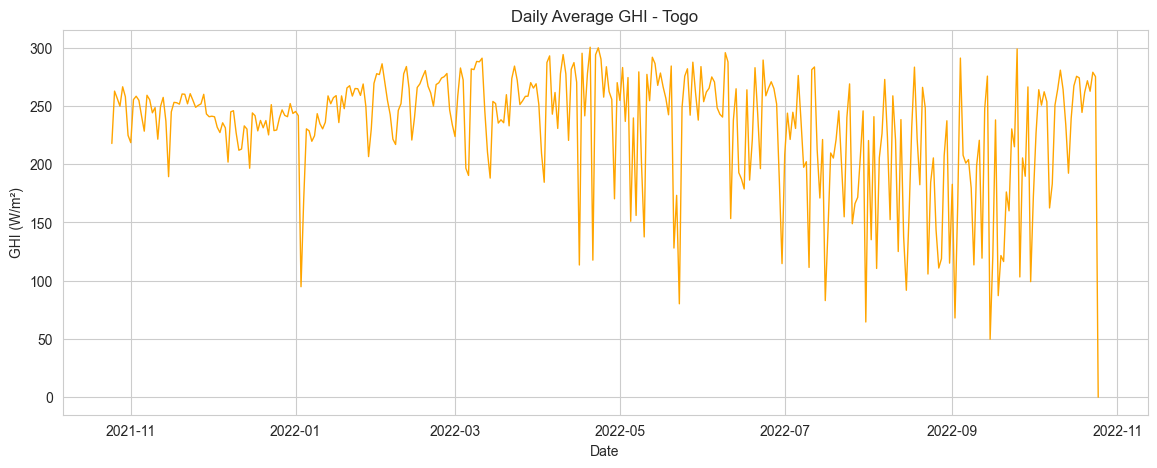

In [28]:
# ----------------------------------------------------------
# 📈 Cell 7 — Daily Average GHI Trend
# ----------------------------------------------------------
plot_daily_ghi(df_imputed, "Togo")

In [29]:
# ----------------------------------------------------------
# 🧼 Cell 8 — Cleaning Impact Analysis
# ----------------------------------------------------------
compare_cleaning_effect(df_imputed)

Average before cleaning:
 ModA    225.979064
ModB    219.401351
dtype: float64

Average after cleaning:
 ModA    535.186477
ModB    532.211744
dtype: float64

Change (after - before):
 ModA    309.207413
ModB    312.810393
dtype: float64


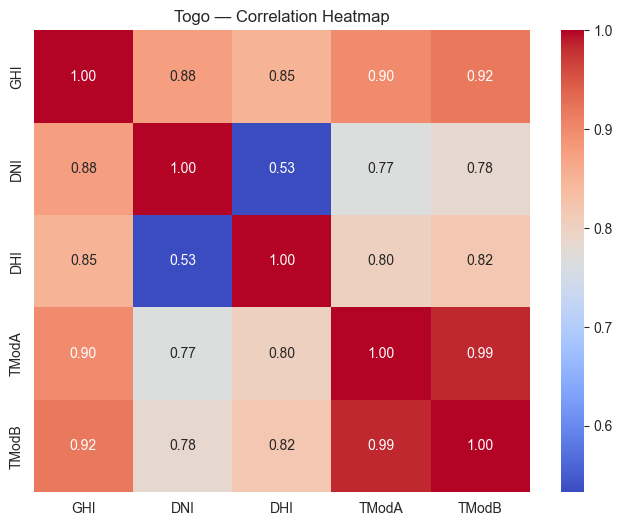

In [30]:
# ----------------------------------------------------------
# 🔥 Cell 9 — Correlation Heatmap
# ----------------------------------------------------------
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plot_correlation_heatmap(df_imputed, corr_cols, title="Togo — Correlation Heatmap")

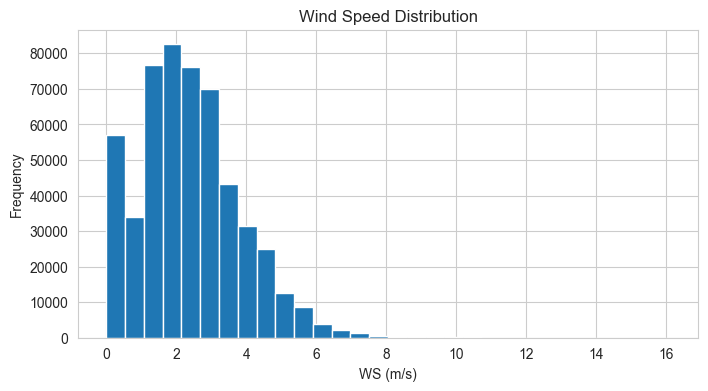

In [31]:
# ----------------------------------------------------------
# 🌬️ Cell 10 — Wind Speed Histogram
# ----------------------------------------------------------
plot_wind_histogram(df_imputed)

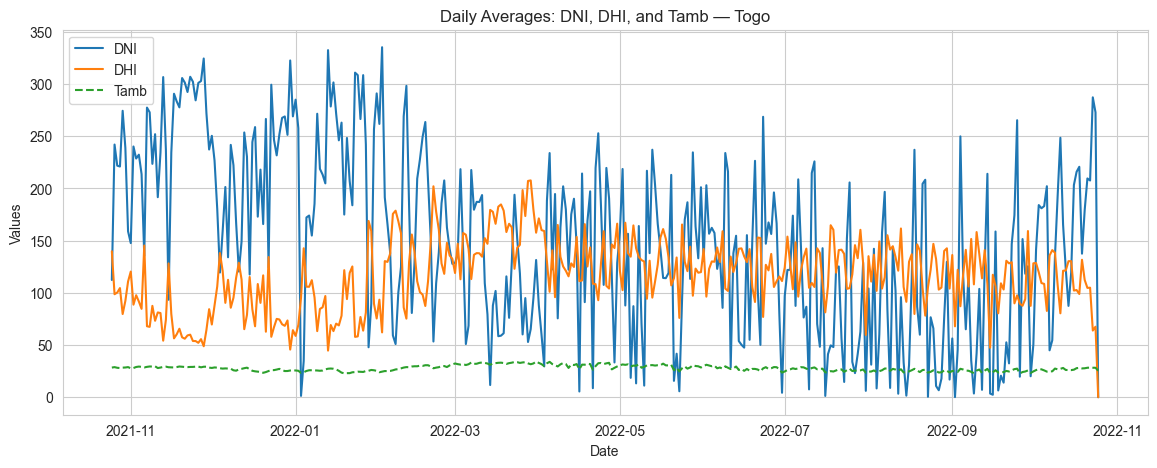

In [32]:
# ----------------------------------------------------------
# 🕒 Cell 11 — Additional Time-Series Trends
# ----------------------------------------------------------
df_daily_avg = df_imputed.resample('D').mean(numeric_only=True)

plt.figure(figsize=(14, 5))
plt.plot(df_daily_avg.index, df_daily_avg['DNI'], label='DNI')
plt.plot(df_daily_avg.index, df_daily_avg['DHI'], label='DHI')
plt.plot(df_daily_avg.index, df_daily_avg['Tamb'], label='Tamb', linestyle='--')

plt.title('Daily Averages: DNI, DHI, and Tamb — Togo')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

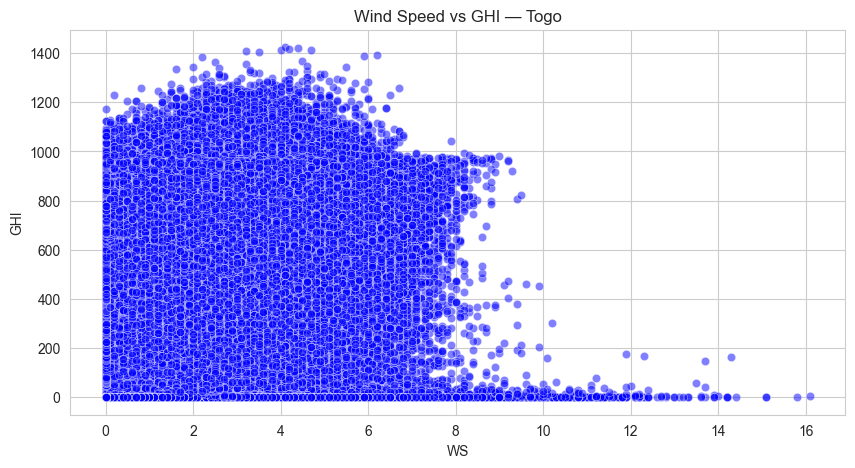

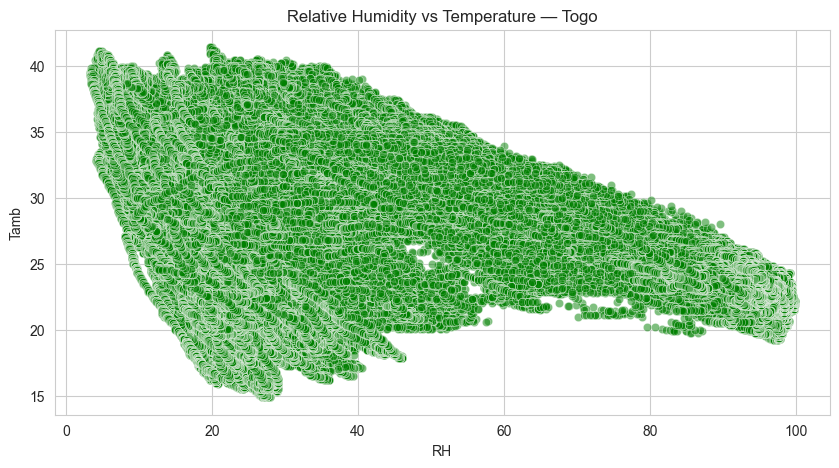

In [33]:
# ----------------------------------------------------------
# ⚡ Cell 12 — Scatter Plots
# ----------------------------------------------------------
plot_scatter(df_imputed, 'WS', 'GHI', title='Wind Speed vs GHI — Togo')
plot_scatter(df_imputed, 'RH', 'Tamb', color='green', title='Relative Humidity vs Temperature — Togo')

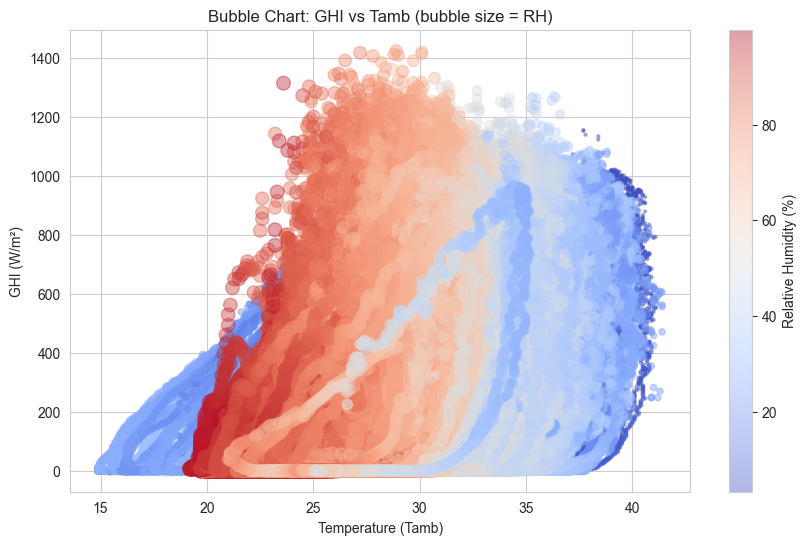

In [34]:
# ----------------------------------------------------------
# 💧 Cell 13 — Bubble Chart (Humidity–Temperature–GHI)
# ----------------------------------------------------------
plot_bubble_chart(df_imputed)

In [35]:
print("✅ Validation Checks:")
print("Negative GHI values:", (df_imputed['GHI'] < 0).sum())
print("Remaining missing values:", df_imputed.isna().sum().sum())
print("Duplicate timestamps:", df_imputed.index.duplicated().sum())

✅ Validation Checks:
Negative GHI values: 0
Remaining missing values: 525600
Duplicate timestamps: 0
